In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
import pandas as pd
import pickle
from scipy.optimize import curve_fit
from scipy.stats import chisquare

In [3]:
# QUESTION 1
from scipy.stats import poisson

average = 6.3 
initial = 15 

# in question ask random with follows poisson
poss_avg = poisson.std(average,loc=0)
 
#z test formulation
z_test = abs(initial - average) / poss_avg
print("Z Test Value =", z_test)

if z_test >= 3:
    print("the hypothesis true")
else:
    print("hypothesis false.")

p = stats.norm.cdf(-z_test) + (1. - stats.norm.cdf(z_test))
print("p-value =", p)

Z Test Value = 3.4661629670697414
the hypothesis true
p-value = 0.0005279431738299246


In [4]:
# QUESTION 2
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

mean_pre = np.mean(pre)
mean_post = np.mean(post)

std_pre = np.std(pre)
std_post = np.std(post)

std = np.sqrt((std_pre**2 + std_post**2)/2)

T = (mean_pre - mean_post)/(std*np.sqrt(2/len(post)))
print(T)

n = len(pre)
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)


-3.991846326292112
p-value = 0.0031489409354536393


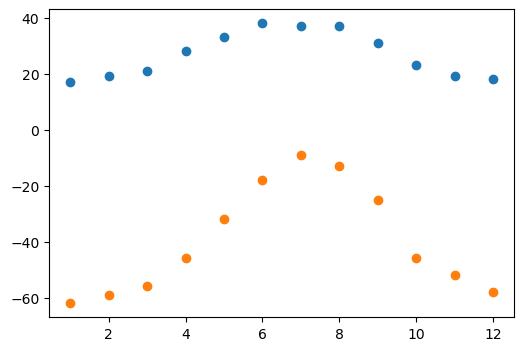

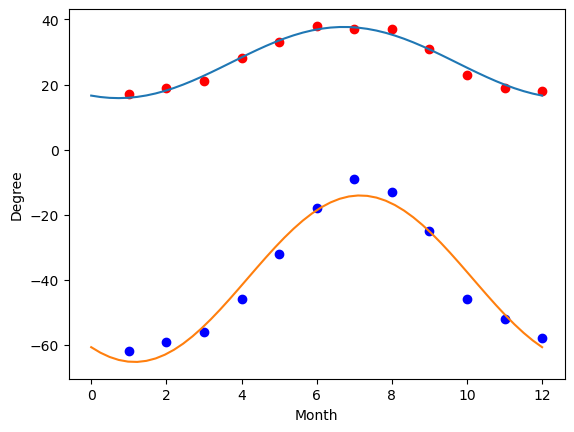

'\nour fit was a little bit off.But taking into account the uncertainties on the parameters, \nwe can see that they are compatible with the values.\nCurve is able to to capture the sudden changes in the temperature values of the data.'

In [5]:
# QUESTION 3
max= [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]

min= [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

months= [1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(figsize=(6, 4))
plt.scatter(months, max)
plt.scatter(months,min)
plt.show()

def f(t,avg,A,offset):
    return (avg+ A * np.cos((t + offset) * 2 * np.pi / t.max()))

popt_max, pcov_max = optimize.curve_fit(f, months, max)
popt_min, pcov_min = optimize.curve_fit(f, months, min)

x = np.linspace(0, 12)

plt.figure()
plt.plot(months, max, 'ro',label='Fit Max Temp')
plt.plot(x, f(x, *popt_max))
plt.plot(months, min, 'bo',label='Fit Min Temp')
plt.plot(x, f(x, *popt_min))
plt.xlabel('Month')
plt.ylabel('Degree')
plt.show()

'''
our fit was a little bit off.But taking into account the uncertainties on the parameters, 
we can see that they are compatible with the values.
Curve is able to to capture the sudden changes in the temperature values of the data.'''

--2023-01-20 18:26:50--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2023-01-20 18:26:51--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca9a8209c7f73e78708665df1de.dl.dropboxusercontent.com/cd/0/inline/B04DEQl6w3oCszP2CmdXsfkbr1QVKGrOlDIhu2C6oiQAWdW8HA5qlzWdKAwQzFnHS7HEjIWC-8bOJj9Kzkt2-u9bcuKWOnk0K-MxiYn557SCmWTv0s77S2ePBgsP_OSupjl93ZejJjP776tbEa23c3QTqrcC6oxulNgXsNyPmn7p0g/file# [following]
--2023-01-20 18:26:51--  https://uca9a8209c7f73e78708665df1de.dl.dropboxusercontent.com/cd/0/inline/B04DEQl6w3oCszP2CmdXsfkbr1QVKGrOlDIhu2C6oiQAWdW8HA5qlzWdKAwQzFnHS7HEjIWC-8bOJj9Kzkt2-u9bcuK

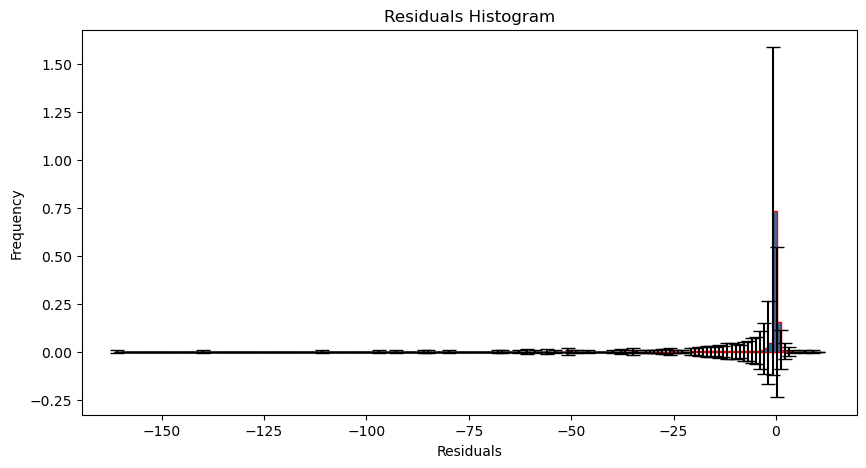

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.007758477229464434

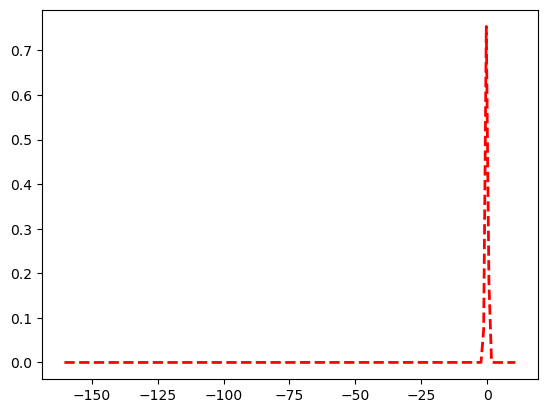

In [7]:
# QUESTION 4
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
unpickled_df = pd.read_pickle("data/residuals_261.pkl")
infile = open("data/residuals_261.pkl",'rb')
new_dict = pickle.load(infile)
infile.close()
new_df= new_dict.item()
new_df = pd.DataFrame(new_df)

a_hat = np.mean(new_df.iloc[:,0])

zeros = new_df[(new_df['distances'])==0]

fig = plt.figure(figsize=(10, 5)) # create the figure and the axes
counts, bin_edges, patches = plt.hist(new_df['residuals'], bins=np.arange(np.min(new_df['residuals']), np.max(new_df['residuals'])), density=True,edgecolor='red') # create and plot the histogram

# Calculate the Poisson uncertainty for each bin
poisson_uncertainty = np.sqrt(counts)

# Set the Poisson uncertainty as the error on the y-axis
plt.errorbar(bin_edges[:-1], counts, yerr=poisson_uncertainty, fmt='none', ecolor='k', capsize=5)

plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Show the plot
plt.show()

def gaussian(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

residuals = new_df['residuals']

# Fit the function to the histogram
params, covariance = curve_fit(gaussian, bin_centers, counts, p0=[np.mean(residuals), np.std(residuals)])

# Get the fitted function
fit = gaussian(bin_centers, *params)

# Plot the fitted function
plt.plot(bin_centers, fit, 'r--', linewidth=2)

# Perform the goodness-of-fit test
chi2, p = chisquare(counts, fit)

# Print the p-value of the fit
print(f"p-value: {p:.3f}")

'''
A p-value 
means that we reject the null hypothesis, therefore our fit 
function does not represents the data and the fit is not satisfactory.'''


Best fit values =  [-9.96203467 12.33174286  9.26282131]


--2023-01-20 18:28:19--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-01-20 18:28:20--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2e87ce33c6d8c137d2fa3c9d55.dl.dropboxusercontent.com/cd/0/inline/B04V3oXFQxNVCH5SqUmJ18v-M5hbi7gZ32p6Epa0IPmZyvvE7y-gZI_KZBBFYM7kmCtrO1EvOWZ-a5vv0UIaCo_3DXzaEa1iWcIvLnjdhsbNz22qeCGKO2WgbA-7_pSwVfZ2zel9Jqsi7MPYxL1Ga9cmz5tPS_53iBOfEzBdsQBgCw/file# [following]
--2023-01-20 18:28:20--  https://uc2e87ce33c6d8c137d2fa3c9d55.dl.dropboxusercontent.com/cd/0/inline/B04V3oX

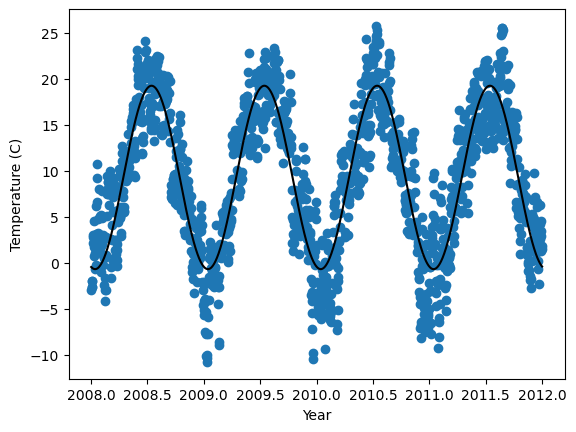

Min temperature: -0.6990214731851534
Max temperature: 19.224753431519183
RSS for f(t): 18669.515394578364
RSS for g(x): 18669.22543095606
F value 0.022598531043162066
p-value: 0.880526617769046 The addition of the parameter b is not statistically significant.


In [9]:
#%%QUESTION 5
from scipy.stats import f
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/
years, temperatures = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt', unpack=True)
keep = np.abs(temperatures) < 90
years = years[keep]
temperatures = temperatures[keep]

def temp_func(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

# Mask the data to use only the data from 2008 to 2012
mask = (years >= 2008) & (years <= 2012)
years = years[mask]
temperatures = temperatures[mask]

# Fit the function to the data
popt, _ = curve_fit(temp_func, years, temperatures)

print('Best fit values = ' , popt)

# Plot the data and the best-fit model
plt.scatter(years, temperatures)
plt.plot(years, temp_func(years, *popt), color='black')
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.show()

average_temperature = np.mean(temperatures)
# Get the minimum value of the function
min_temp = np.min(temp_func(years, *popt))
max_temp = np.max(temp_func(years, *popt))

print('Min temperature:' ,min_temp)
print('Max temperature:' ,max_temp)

'''The parameter "b" represents the phase shift of the cosine function. 
It is the amount by which the function is shifted horizontally to the left or right. 
This parameter determines the time of the year when the temperature is 
the highest and lowest.'''

def temp_func_2(x, a, b, c, d):
    return a * np.cos(2 * np.pi * b * x + c) + d

popt_2, _ = curve_fit(temp_func_2, years, temperatures)
# RSS for f(t) = a*cos(2*pi*t + b) + c
rss_f = sum((temperatures - temp_func(years, *popt))**2)

# RSS for g(x) = a*cos(2*pi*b*x + c) + d
rss_g = sum((temperatures - temp_func_2(years, *popt_2))**2)


print('RSS for f(t):' ,rss_f)
print('RSS for g(x):' ,rss_g)

F = ((rss_f - rss_g) / (4-3)) / (rss_g / (len(years) - 4))
print('F value', F)

pval = 1. - stats.f.cdf(F, 4 - 3, len(years) - 4)
if pval < 0.05:
    print("p-value:" ,pval, 'The addition of the parameter b is statistically significant')
else:
    print("p-value:" ,pval,"The addition of the parameter b is not statistically significant.")
